In [4]:
import nibabel as nib
import numpy as np
from sklearn.cluster import KMeans
import os
import cv2
import matplotlib.pyplot as plt
from normalization import intensity_normalization

In [5]:
def plot_clusters(cluster_1,cluster_2,cluster_3,title = None,hight = 350):
    plt.figure(figsize=(14, 6))
    plt.bar(range(255), cluster_1, width=1, edgecolor="black",alpha=0.5,color = 'red',label='Low intensity')
    plt.bar(range(255), cluster_2, width=1, edgecolor="black",alpha=0.5,color = 'PaleGreen',label='Median intensity')
    plt.bar(range(255), cluster_3, width=1, edgecolor="black",alpha=0.5,color = 'blue',label='High intensity')
    plt.title(f"Intensity Histogram: {title}", fontsize=14)
    plt.xlabel("Intensity Value", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.ylim(0, hight)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(loc='upper right', fontsize=12)
    plt.show()
    plt.savefig(f"/Volumes/Elements/Clustering_T2/Hist-all-images/{title}.png", dpi=300, bbox_inches='tight')
    plt.close()

# Get clustering information

In [6]:
cluster_dir = '/Volumes/Elements/Clustering_T2/kmeans Clusters_3'
# image_dir = '/Volumes/Elements/IPMN_images_masks/t2/images'
image_dir = '/Volumes/Elements/Clustering_T2/intensity_normalized'

cluster_dict = {}

for name in os.listdir(image_dir):
    # Load image
    # if name.endswith('.nii.gz') and not name.startswith('.'):
    try:
        image_path = os.path.join(image_dir,name)
        img = nib.load(image_path)
        img_np = img.get_fdata()
        
        # Load clusters label
        clusters_path = os.path.join(cluster_dir,name)
        clusters = nib.load(clusters_path)
        clusters_np = clusters.get_fdata()
        # segmentation mask
        mask = clusters_np.copy()
        mask[mask != 0] = 1

        # Get the pancreas rigion
        clean_data = mask*img_np
        
        # Normalization
        # clean_data = intensity_normalization(clean_data)

        # match the corresponding cluster region
        mask_1 = (clusters_np == 1)
        mask_2 = (clusters_np == 2)
        mask_3 = (clusters_np == 3)
        cluster_1 = np.where(mask_1, clean_data, 0)
        cluster_2 = np.where(mask_2, clean_data, 0)
        cluster_3 = np.where(mask_3, clean_data, 0)
        cluster_dict[name] = {'cluster_1':cluster_1,'cluster_2':cluster_2,'cluster_3':cluster_3}
    except Exception as e:
        print(f'Error occured:{e}')

Error occured:Cannot work out file type of "/Volumes/Elements/Clustering_T2/intensity_normalized/._ahn_02.nii.gz"
Error occured:Cannot work out file type of "/Volumes/Elements/Clustering_T2/intensity_normalized/._ahn_05.nii.gz"
Error occured:Cannot work out file type of "/Volumes/Elements/Clustering_T2/intensity_normalized/._ahn_09.nii.gz"
Error occured:Cannot work out file type of "/Volumes/Elements/Clustering_T2/intensity_normalized/._ahn_11.nii.gz"
Error occured:Cannot work out file type of "/Volumes/Elements/Clustering_T2/intensity_normalized/._ahn_12.nii.gz"
Error occured:Cannot work out file type of "/Volumes/Elements/Clustering_T2/intensity_normalized/._ahn_16.nii.gz"
Error occured:Cannot work out file type of "/Volumes/Elements/Clustering_T2/intensity_normalized/._ahn_21.nii.gz"
Error occured:Cannot work out file type of "/Volumes/Elements/Clustering_T2/intensity_normalized/._ahn_27.nii.gz"
Error occured:Cannot work out file type of "/Volumes/Elements/Clustering_T2/intensity_no

In [7]:
def get_avg_cluster_hist(cluster_dict:dict, sub_list = None):
    if sub_list is None:
        sub_list = cluster_dict.keys()
    
    avg_cluster_1 =np.zeros(255)
    avg_cluster_2 =np.zeros(255)
    avg_cluster_3 =np.zeros(255)
    
    for key in sub_list:
        cluster_1 = cluster_dict[key]['cluster_1']
        cluster_2 = cluster_dict[key]['cluster_2']
        cluster_3 = cluster_dict[key]['cluster_3']
        avg_cluster_1 += np.histogram(cluster_1, bins=255, range=(1, 255))[0]
        avg_cluster_2 += np.histogram(cluster_2, bins=255, range=(1, 255))[0]
        avg_cluster_3 += np.histogram(cluster_3, bins=255, range=(1, 255))[0]
    
    avg_cluster_1 = avg_cluster_1/len(sub_list)
    avg_cluster_2 = avg_cluster_2/len(sub_list)
    avg_cluster_3 = avg_cluster_3/len(sub_list)
    print(len(sub_list))
    return avg_cluster_1,avg_cluster_2,avg_cluster_3

In [8]:
def lowercase_keys(d):
    if isinstance(d, dict):
        return {key.lower(): lowercase_keys(value) for key, value in d.items()}
    else:
        return d

lowercase_dict = lowercase_keys(cluster_dict)

## Intensity Distribution
The visualization contains 4 parts, whole dataset, center-wise comparison, risk-wise comparison


# Whole dataset


738


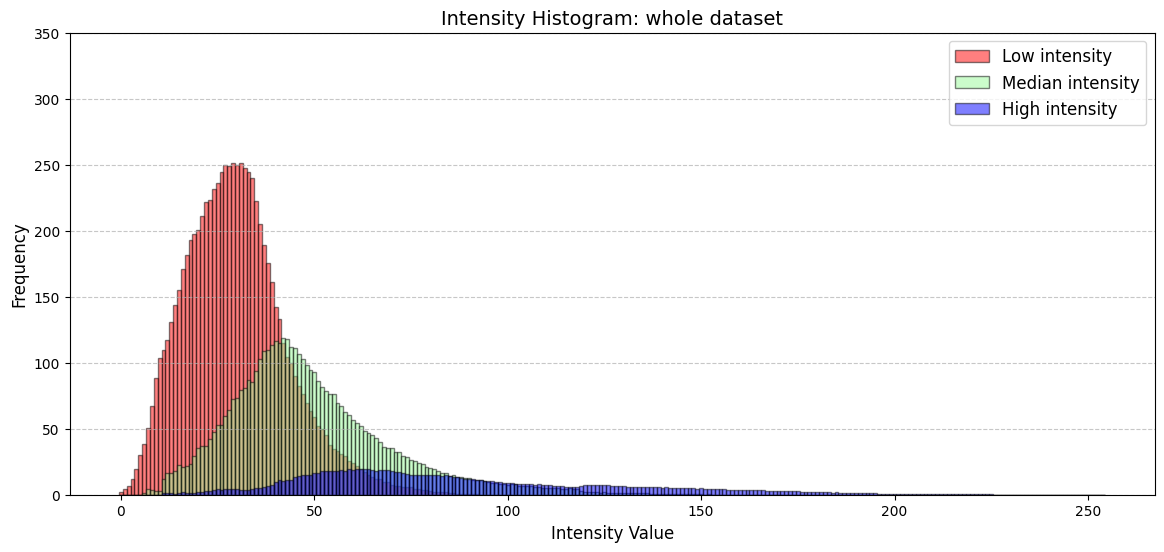

In [9]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict)
plot_clusters(avg_1,avg_2,avg_3,title='whole dataset')

Read the dataset information

In [10]:
import pandas as pd
label = pd.read_excel('/Volumes/Elements/IPMN_images_masks/IPMN_labels_t2_total.xlsx')[['name','risk assessment']]

In [11]:
label['name'] = label['name'].apply(lambda x: x+'.nii.gz' if not x.endswith('.nii.gz') else x)
label['name'] = label['name'].apply(lambda x: x.lower())

In [12]:
low_grade = label[label['risk assessment']==1]
high_grade = label[label['risk assessment']==2]
none_grade = label[label['risk assessment']==0]

None Grade

159


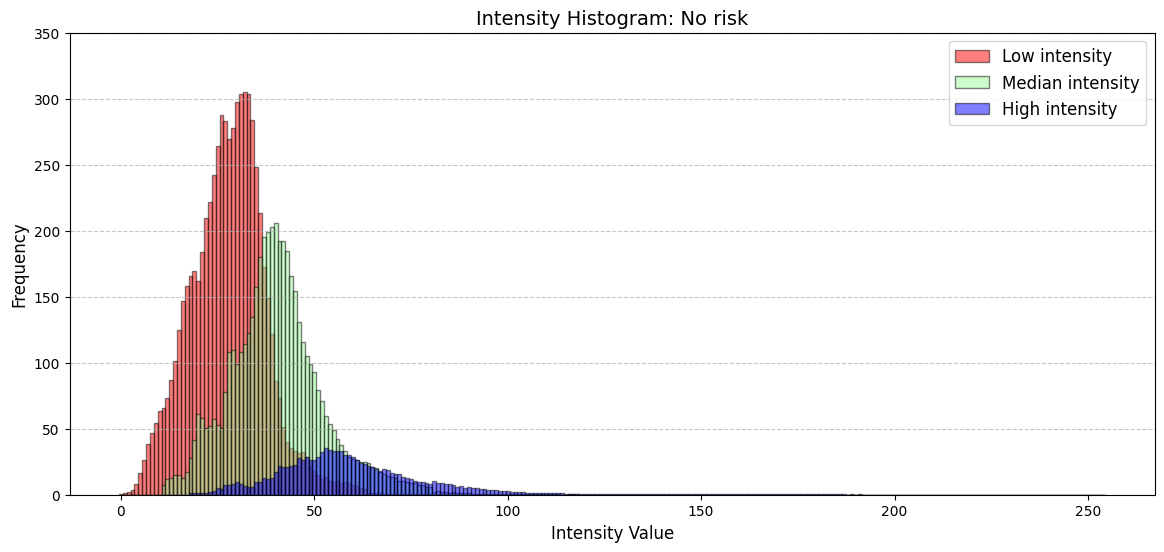

In [13]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(none_grade['name']))
plot_clusters(avg_1,avg_2,avg_3,title='No risk')

low_grade

344


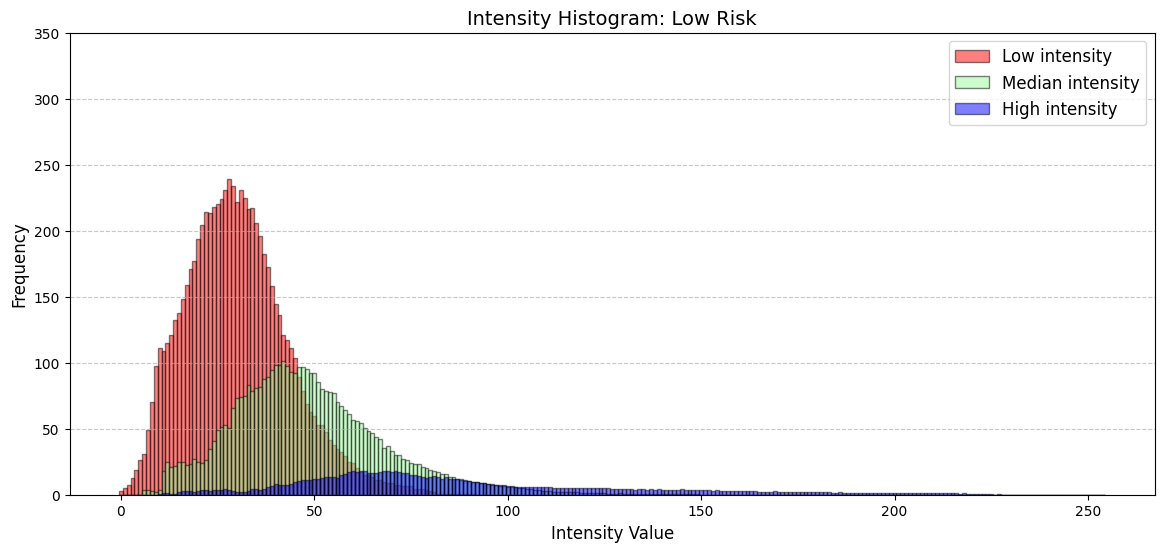

In [14]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(low_grade['name']))
plot_clusters(avg_1,avg_2,avg_3,title='Low Risk')

152


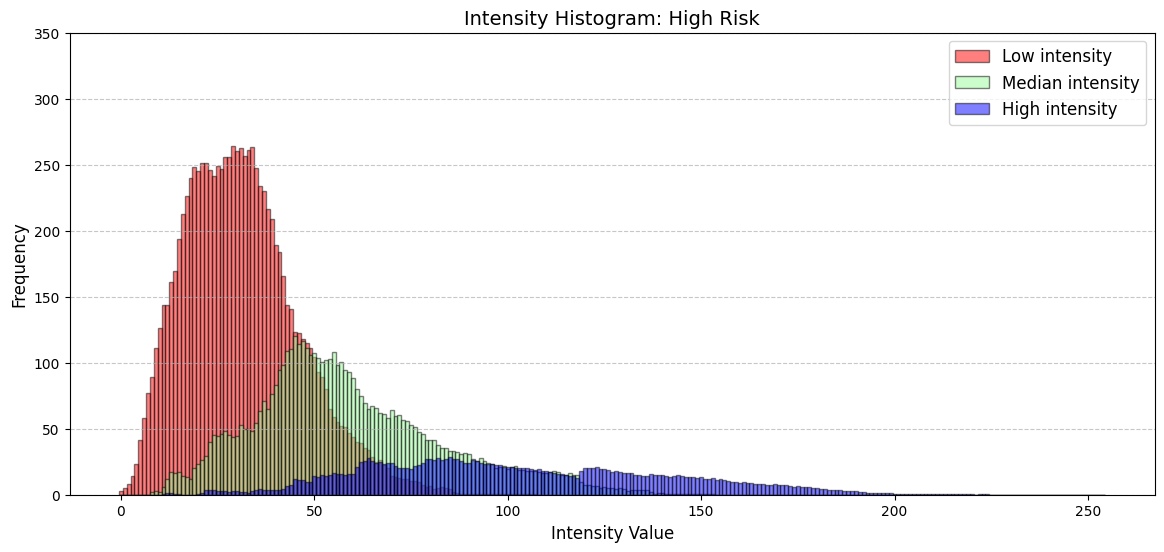

In [15]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(high_grade['name']))
plot_clusters(avg_1,avg_2,avg_3,title='High Risk')

# Center-wise comparison

In [16]:
centers = ['nu','cad','emc','iu','ahn','nyu','northwestern','mca','mcf']
center_dfs = {}
for center in centers:
    center_dfs[center] = label[label['name'].str.contains(center, case=False, na=False)]

In [17]:
center_dfs['nu']+center_dfs['northwestern']

,name,risk assessment
166,NaN,NaN
167,NaN,NaN
168,NaN,NaN
169,NaN,NaN
170,NaN,NaN
...,...,...
733,NaN,NaN
734,NaN,NaN
735,NaN,NaN
736,NaN,NaN


207


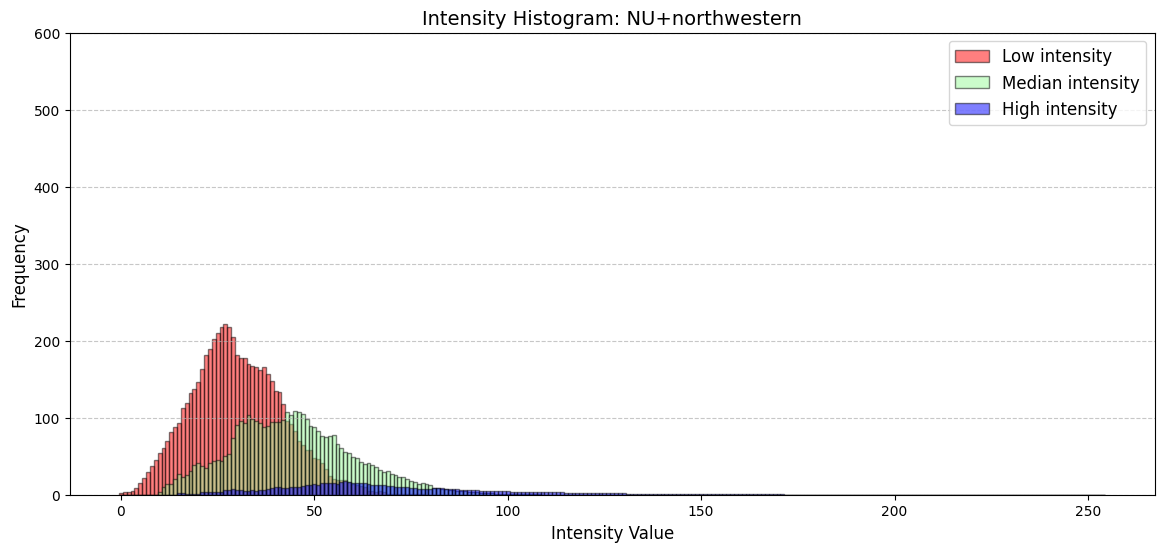

In [18]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(pd.concat([center_dfs['nu'], center_dfs['northwestern']], axis=0, ignore_index=True)['name']))
plot_clusters(avg_1,avg_2,avg_3,title='NU+northwestern',hight=600)

124


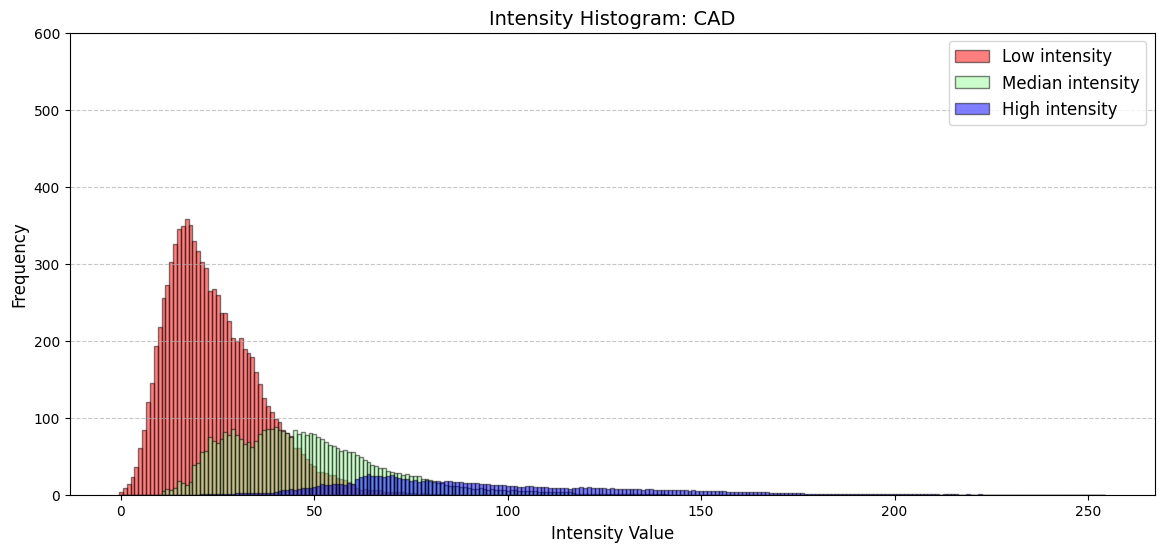

In [19]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(center_dfs['cad']['name']))
plot_clusters(avg_1,avg_2,avg_3,title='CAD',hight=600)

103


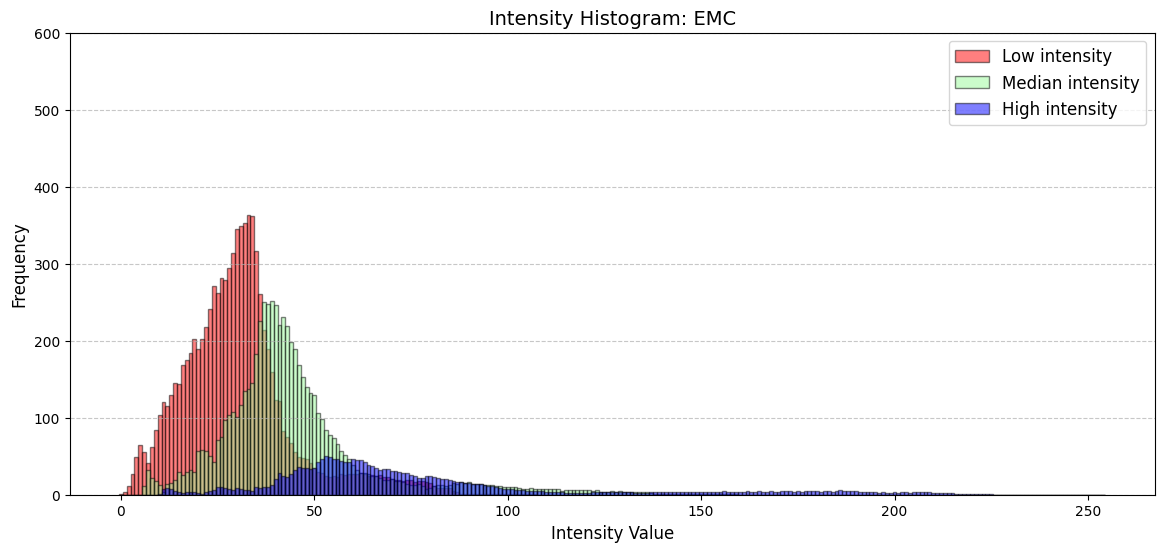

In [20]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(center_dfs['emc']['name']))
plot_clusters(avg_1,avg_2,avg_3,title='EMC',hight=600)

73


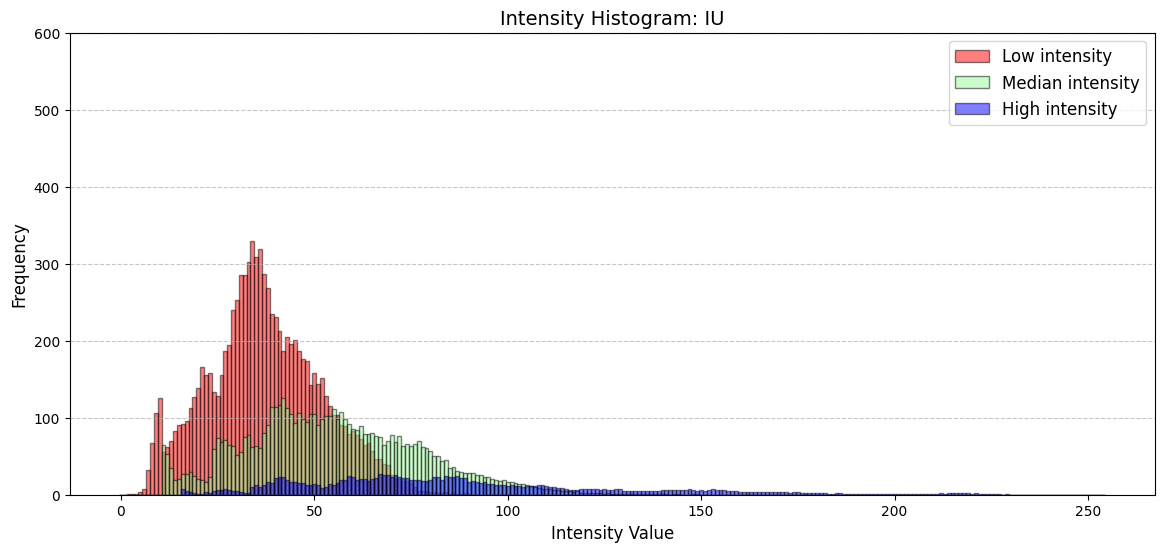

In [21]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(center_dfs['iu']['name']))
plot_clusters(avg_1,avg_2,avg_3,title='IU',hight=600)

27


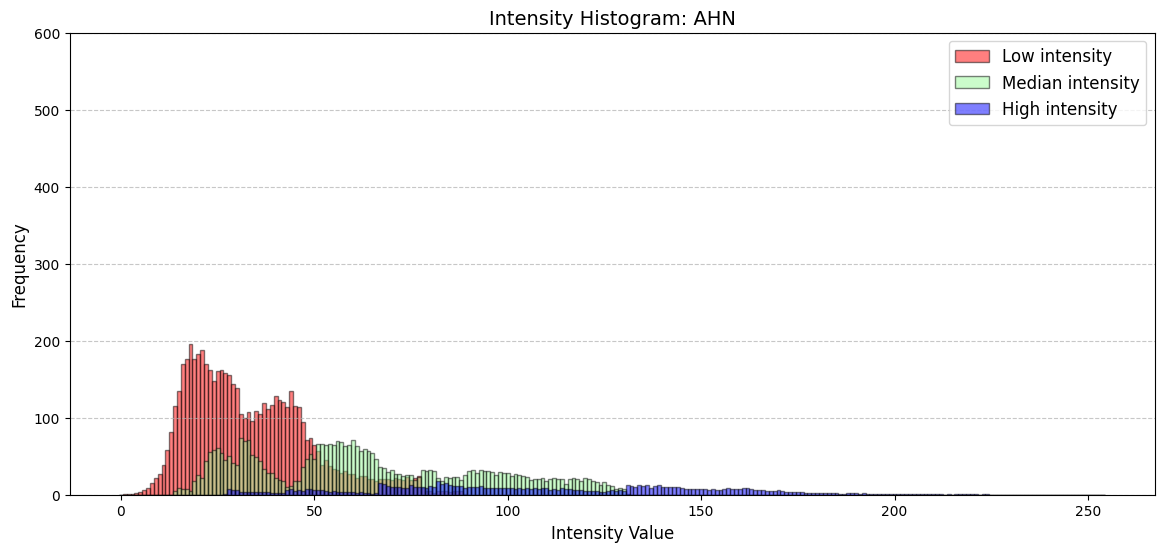

In [22]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(center_dfs['ahn']['name']))
plot_clusters(avg_1,avg_2,avg_3,title='AHN',hight=600)

162


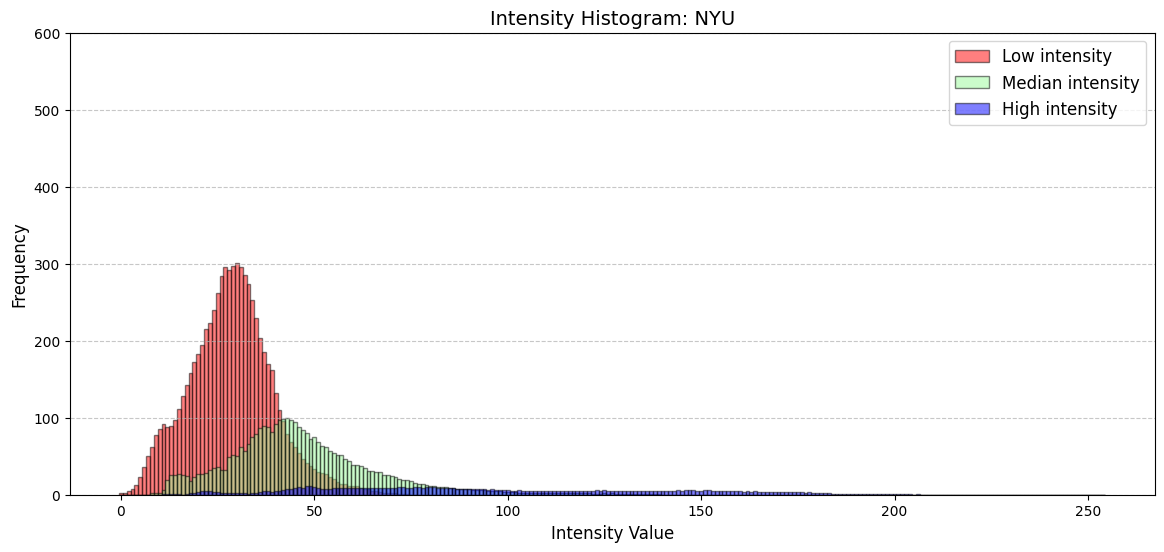

In [23]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(center_dfs['nyu']['name']))
plot_clusters(avg_1,avg_2,avg_3,title='NYU',hight=600)

23


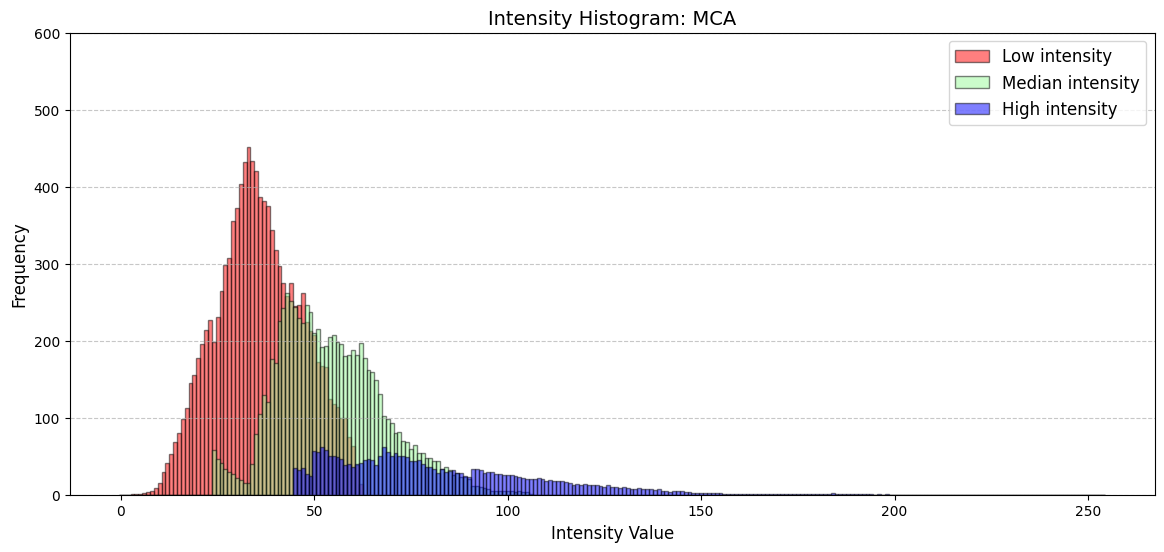

In [24]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(center_dfs['mca']['name']))
plot_clusters(avg_1,avg_2,avg_3,title='MCA',hight=600)

19


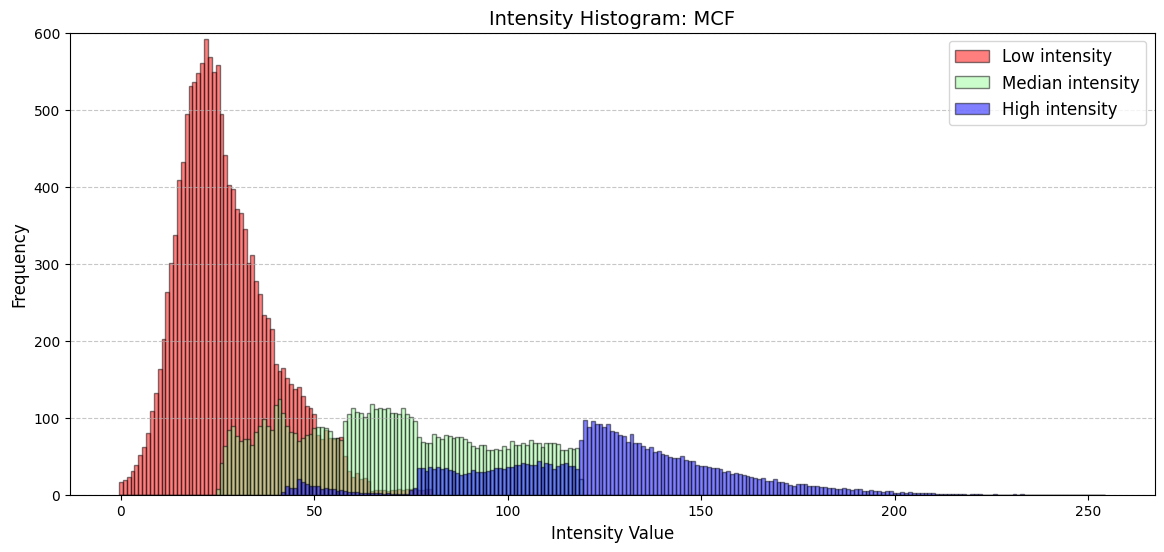

In [25]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(center_dfs['mcf']['name']))
plot_clusters(avg_1,avg_2,avg_3,title='MCF',hight=600)